In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, accuracy_score, classification_report,precision_score, recall_score, f1_score

In [2]:
file_path = "health_lifestyle_dataset.xlsx"

# Read original dataset
original_df = pd.read_excel(file_path)

print("Dataset Loaded Successfully!\n")
print(original_df.head())

Dataset Loaded Successfully!

    Age  Gender  Occupation  Sleep_hours  Screen_time  Exercise_time  \
0  56.0     1.0         5.0          8.2          5.4            0.5   
1  46.0     1.0         1.0          8.4          5.2            2.8   
2  32.0     1.0         5.0          7.1          3.7            0.0   
3  60.0     1.0         1.0          7.0          2.9            0.0   
4  25.0     0.0         4.0          7.4          3.6            1.8   

   Water_intake  Junk_food_freq  Alcohol    Steps  Meals   BMI  Health_rating  \
0           1.6             4.0      2.0   5965.0    2.0  20.6            5.3   
1           1.7             5.0      5.0  12086.0    5.0  20.1            6.1   
2           1.0             0.0      2.0   5005.0    5.0  19.4            4.3   
3           1.7             7.0      1.0   9073.0    3.0  23.5            1.8   
4           2.2             7.0      1.0  14343.0    3.0  20.0            4.5   

   Stress_level  Happiness_level  Productivity_sco

In [3]:
print("\nChecking Missing Values:")
print(original_df.isnull().sum())

# Fill missing numeric values with median
numeric_cols = original_df.select_dtypes(include=['number']).columns
original_df[numeric_cols] = original_df[numeric_cols].fillna(original_df[numeric_cols].median())

# Fill missing categorical values with mode
cat_cols = original_df.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    original_df[col] = original_df[col].fillna(original_df[col].mode()[0])

# Drop duplicate rows
original_df = original_df.drop_duplicates()

print("\nAfter Cleaning:")
print(original_df.isnull().sum())


Checking Missing Values:
Age                   2
Gender                2
Occupation            2
Sleep_hours           2
Screen_time           2
Exercise_time         2
Water_intake          2
Junk_food_freq        2
Alcohol               2
Steps                 2
Meals                 2
BMI                   2
Health_rating         2
Stress_level          2
Happiness_level       2
Productivity_score    2
Sleep_quality         2
Health_category       2
Balanced_life         2
dtype: int64

After Cleaning:
Age                   0
Gender                0
Occupation            0
Sleep_hours           0
Screen_time           0
Exercise_time         0
Water_intake          0
Junk_food_freq        0
Alcohol               0
Steps                 0
Meals                 0
BMI                   0
Health_rating         0
Stress_level          0
Happiness_level       0
Productivity_score    0
Sleep_quality         0
Health_category       0
Balanced_life         0
dtype: int64



Regression Metrics:
MAE : 0.898777075791299
MSE : 1.163208131405895
RMSE: 1.0785212707248268
R2 Score: 0.2848028232593045

Accuracy Score: 0.9


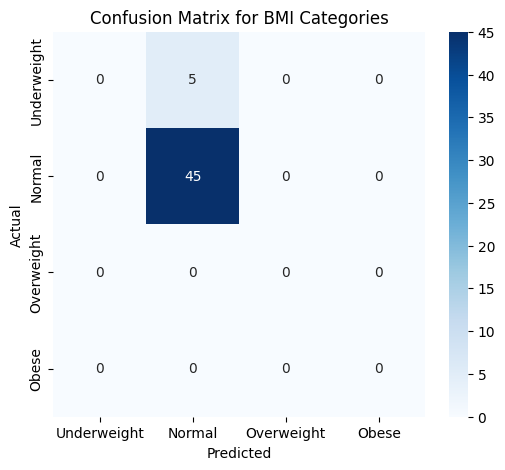


Classification Report:



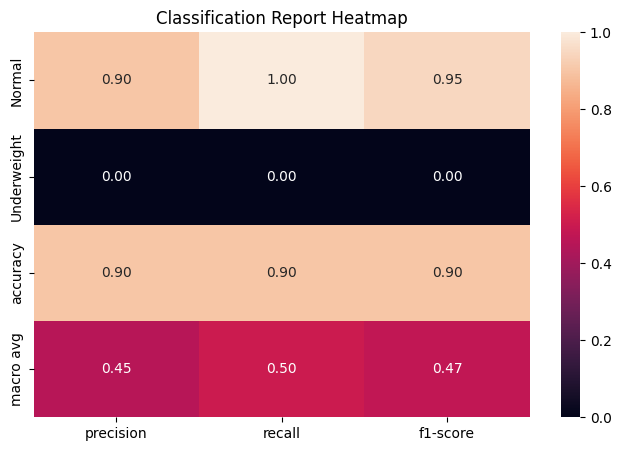

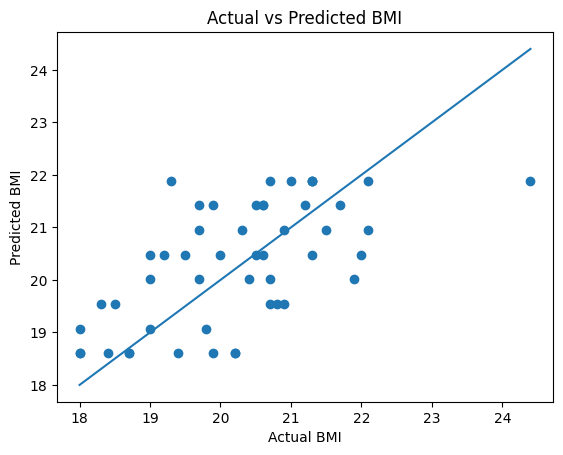

In [4]:
# Copy dataset
df_lr = original_df.copy()

# Select Target and Features
target = 'BMI'   # Target variable

X = df_lr[['Junk_food_freq']]   # Feature
y = df_lr[target]

# Encode categorical variables 
X = pd.get_dummies(X, drop_first=True)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation Metrics (Regression)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nRegression Metrics:")
print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

# Convert BMI into categories
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

# Convert actual and predicted BMI to categories
y_test_cat = y_test.apply(bmi_category)
y_pred_cat = pd.Series(y_pred).apply(bmi_category)

# Accuracy Score
acc = accuracy_score(y_test_cat, y_pred_cat)
print("\nAccuracy Score:", acc)

# Confusion Matrix
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
cm = confusion_matrix(y_test_cat, y_pred_cat, labels=labels)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for BMI Categories")
plt.show()

# Classification Report
print("\nClassification Report:\n")
report = classification_report(y_test_cat, y_pred_cat, output_dict=True,zero_division=0)
df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(df.iloc[:-1, :-1], annot=True, fmt=".2f")
plt.title("Classification Report Heatmap")
plt.show()


# Actual vs Predicted Plot
plt.figure()
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel("Actual BMI")
plt.ylabel("Predicted BMI")
plt.title("Actual vs Predicted BMI")
plt.show()